In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import xarray as xr
from netCDF4 import Dataset
import pandas as pd
import netCDF4

from cartopy import config
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.util import add_cyclic_point
import matplotlib.ticker as mticker


from mpl_toolkits.axes_grid1 import ImageGrid
from sklearn.linear_model import LinearRegression
import matplotlib as mpl
import matplotlib.gridspec as gridspec

from datetime import datetime

import tol_colors as tc

In [37]:
figfolder = './figures/'

dataset1 = 'ERA5'
dataset2 = 'MERRA2'
#dataset = 'IMERG'
dataset3 = 'GOCCP'

mon_mar = 'Mar'
mon_sep = 'Sep'

ver_er = 'lcc'
ver_mr = 'CLDLOW'


#ver_2 = 'CLOUD'
#ver3 = 'tp'
#ver4 = 'PRECTOTCORR'
#ver_pr = 'precipitationCal'


dri = '/lss/research/agon-lab/ERA5_ITCZ_Subdaily/normalized_ctp_files/monthly_avg/'
fn = 'ERA5_normalized_ctp_cu_lcc_2007_2016_2.5deg_monthly_avg.nc'
data_era_cu = xr.open_dataset(dri+fn)

fn = 'ERA5_normalized_ctp_sc_lcc_2007_2016_2.5deg_monthly_avg.nc'
data_era_sc = xr.open_dataset(dri+fn)

fn = 'ERA5_2D_new_ctp_ta_lcc_2007_2016_2.5deg_monthly_avg_all_days_mid.nc'
#data_era_ta = xr.open_dataset(dri+fn)

dri = '/lss/research/agon-lab/MERRA2_3hrly/normalized_ctp/monthly_avg/'
fn  = 'MERRA2_normalized_ctp_cu_lcc_2007_2016_2.5deg_monthly_avg.nc'
data_merra_cu = xr.open_dataset(dri+fn)

fn  = 'MERRA2_normalized_ctp_sc_lcc_2007_2016_2.5deg_monthly_avg.nc'
data_merra_sc = xr.open_dataset(dri+fn)

fn  = 'MERRA2_2D_new_ctp_ta_lcc_2007_2016_2.5deg_monthly_avg_all_days_mid.nc'
#data_merra_ta = xr.open_dataset(dri+fn)



In [3]:
data_merra_sc

<xarray.Dataset> Size: 50kB
Dimensions:    (latitude: 25, longitude: 41, month: 12)
Coordinates:
  * latitude   (latitude) float32 100B -30.0 -27.5 -25.0 ... 25.0 27.5 30.0
  * longitude  (longitude) float32 164B 200.0 202.5 205.0 ... 295.0 297.5 300.0
  * month      (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    CLDLOW     (month, latitude, longitude) float32 49kB ...

#### CASCCAD Sc+Cu

In [4]:
var_gc = 'low2D'

dri = '/home/ffahrin/test/CASCCAD/'
fn = 'cusc_'+var_gc+'_200701-201612_avg_interpolated.nc'
data_goccp = xr.open_dataset(dri+fn)

In [5]:
var_gc = 'low2D'

dri = '/home/ffahrin/test/CASCCAD/'
fn = 'CC_cusc_'+var_gc+'_200701-201012_avg_interpolated.nc'
data_cc = xr.open_dataset(dri+fn)

In [6]:
data_cc

<xarray.Dataset> Size: 1MB
Dimensions:    (time: 12, latitude: 73, longitude: 144)
Coordinates:
  * time       (time) datetime64[ns] 96B 2010-01-01 2010-02-01 ... 2010-12-01
  * latitude   (latitude) float32 292B 90.0 87.5 85.0 82.5 ... -85.0 -87.5 -90.0
  * longitude  (longitude) float32 576B 0.0 2.5 5.0 7.5 ... 352.5 355.0 357.5
Data variables:
    low2D      (time, latitude, longitude) float64 1MB ...

#### CASCCAD Sc & Cu

In [7]:
#dataset = 'CASCCAD'


var_gc_cu = 'cul2D'
var_gc_sc = 'allsc2D'
#ver3 = 'allcu+sc3D'


dri = '/home/ffahrin/test/CASCCAD/'
fn = 'cusc_cul2D_200701-201612_avg_interpolated.nc'
data_goccp_cu = xr.open_dataset(dri+fn)

fn = 'cusc_allsc2D_200701-201612_avg_interpolated.nc'
data_goccp_sc = xr.open_dataset(dri+fn)

#fn = 'cusc_allcu+sc3D_200701-201612_avg_interpolated.nc'
#data_cu_sc = xr.open_dataset(dri+fn)

In [9]:
var_cc_cu = 'cul2D'
var_cc_sc = 'allsc2D'
#ver3 = 'allcu+sc3D'


dri = '/home/ffahrin/test/CASCCAD/'
fn = 'CC_cusc_cul2D_200701-201012_avg_interpolated.nc'
data_cc_cu = xr.open_dataset(dri+fn)

fn = 'CC_cusc_allsc2D_200701-201012_avg_interpolated.nc'
data_cc_sc = xr.open_dataset(dri+fn)


In [10]:
lats = -15
latn = 0
#lonw = -150
#lone = -60

lonw_eq = 240
lone_eq = 280

lev0 = 975
lev1 = 700

lev0_cc= 700
lev1_cc= 975

yr0 = 2007
yrf = 2016


In [11]:
era_cu = data_era_cu[''+ver_er+''][:,:,:].sel(latitude=slice(lats,latn),longitude=slice(lonw_eq,lone_eq))
era_sc = data_era_sc[''+ver_er+''][:,:,:].sel(latitude=slice(lats,latn),longitude=slice(lonw_eq,lone_eq))
#era_ta = data_era_ta[''+ver_er+''][:,:,:].sel(latitude=slice(lats,latn),longitude=slice(lonw_eq,lone_eq))

In [12]:
merra_cu = data_merra_cu[''+ver_mr+''][:,:,:].sel(latitude=slice(lats,latn),longitude=slice(lonw_eq,lone_eq))
merra_sc = data_merra_sc[''+ver_mr+''][:,:,:].sel(latitude=slice(lats,latn),longitude=slice(lonw_eq,lone_eq))
#merra_ta = data_merra_ta[''+ver_mr+''][:,:,:].sel(latitude=slice(lats,latn),longitude=slice(lonw_eq,lone_eq))

In [14]:
gc_sc = data_goccp_sc[''+var_gc_sc+''][:,::-1,:].sel(latitude=slice(lats,latn),longitude=slice(lonw_eq,lone_eq))

In [15]:
gc_cu = data_goccp_cu[''+var_gc_cu+''][:,::-1,:].sel(latitude=slice(lats,latn),longitude=slice(lonw_eq,lone_eq))

In [16]:
cc_sc = data_cc_sc[''+var_cc_sc+''][:,::-1,:].sel(latitude=slice(lats,latn),longitude=slice(lonw_eq,lone_eq))
cc_cu = data_cc_cu[''+var_cc_cu+''][:,::-1,:].sel(latitude=slice(lats,latn),longitude=slice(lonw_eq,lone_eq))

In [17]:
# land-sea mask
fn_lsm = '/lss/research/agon-lab/ERA5_ITCZ_daily/lsm_era5.nc'# load the land-sea mask here and do a where statement further down   
data_lsm = xr.open_dataset(fn_lsm)
lsm = data_lsm['lsm'][0,::-10,::10].sel(latitude=slice(lats,latn),longitude=slice(lonw_eq,lone_eq))
lsm_pr = data_lsm['lsm'][0,::,::].sel(latitude=slice(latn,lats),longitude=slice(lonw_eq,lone_eq))

In [18]:
era_cu_yz = era_cu.where(lsm==0).mean(dim=('latitude', 'longitude'))
merra_cu_yz = merra_cu.where(lsm==0).mean(dim=('latitude', 'longitude'))


In [19]:
era_sc_yz = era_sc.where(lsm==0).mean(dim=('latitude', 'longitude'))
merra_sc_yz = merra_sc.where(lsm==0).mean(dim=('latitude', 'longitude'))

In [22]:
gc_sc_yz = gc_sc.where(lsm==0).mean(dim=('latitude', 'longitude'))
cc_sc_yz = cc_sc.where(lsm==0).mean(dim=('latitude', 'longitude'))

In [23]:
gc_cu_yz = gc_cu.where(lsm==0).mean(dim=('latitude', 'longitude'))
cc_cu_yz = cc_cu.where(lsm==0).mean(dim=('latitude', 'longitude'))

In [24]:
variable = 'cf'

In [25]:
cl_sc = 'Sc'

In [26]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec',]

In [27]:
x = np.arange(0, 4 * np.pi, 0.01)

#x = np.arange(0, 4 * np.pi, 10)
fs = 12

In [29]:
dri = '/lss/research/agon-lab/ERA5_ITCZ_Subdaily/normalized_ctp_files/monthly_avg/'
fn = 'ERA5_normalized_ctp_2D_cu_days_freq_2007_2016_2.5deg_monthly_avg.nc'
data_era_cu_day = xr.open_dataset(dri+fn)

fn = 'ERA5_normalized_ctp_2D_sc_days_freq_2007_2016_2.5deg_monthly_avg.nc'
data_era_sc_day = xr.open_dataset(dri+fn)

fn = 'ERA5_normalized_ctp_2D_ta_days_freq_2007_2016_2.5deg_monthly_avg.nc'
data_era_ta_day  = xr.open_dataset(dri+fn)

dri = '/lss/research/agon-lab/MERRA2_3hrly/normalized_ctp/monthly_avg/'
fn  = 'MERRA2_normalized_ctp_2D_cu_days_freq_2007_2016_2.5deg_monthly_avg.nc'
data_merra_cu_day  = xr.open_dataset(dri+fn)

fn  = 'MERRA2_normalized_ctp_2D_sc_days_freq_2007_2016_2.5deg_monthly_avg.nc'
data_merra_sc_day  = xr.open_dataset(dri+fn)

fn  = 'MERRA2_normalized_ctp_2D_ta_days_freq_2007_2016_2.5deg_monthly_avg.nc'
data_merra_ta_day  = xr.open_dataset(dri+fn)


ver_1 = 'days'
ver_2 = 'days'

In [30]:
era_cu_days = data_era_cu_day[''+ver_1+''][:,:,:].sel(latitude=slice(lats,latn),longitude=slice(lonw_eq,lone_eq))
era_sc_days = data_era_sc_day[''+ver_1+''][:,:,:].sel(latitude=slice(lats,latn),longitude=slice(lonw_eq,lone_eq))
era_ta_days = data_era_ta_day[''+ver_1+''][:,:,:].sel(latitude=slice(lats,latn),longitude=slice(lonw_eq,lone_eq))

In [31]:
merra_cu_days = data_merra_cu_day[''+ver_2+''][:,:,:].sel(latitude=slice(lats,latn),longitude=slice(lonw_eq,lone_eq))
merra_sc_days = data_merra_sc_day[''+ver_2+''][:,:,:].sel(latitude=slice(lats,latn),longitude=slice(lonw_eq,lone_eq))
merra_ta_days = data_merra_ta_day[''+ver_2+''][:,:,:].sel(latitude=slice(lats,latn),longitude=slice(lonw_eq,lone_eq))


In [32]:
era_cu_days_yz = era_cu_days.where(lsm==0).mean(dim=('latitude', 'longitude'))
era_sc_days_yz = era_sc_days.where(lsm==0).mean(dim=('latitude', 'longitude'))
era_ta_days_yz = era_ta_days.where(lsm==0).mean(dim=('latitude', 'longitude'))


merra_cu_days_yz = merra_cu_days.where(lsm==0).mean(dim=('latitude', 'longitude'))
merra_sc_days_yz = merra_sc_days.where(lsm==0).mean(dim=('latitude', 'longitude'))
merra_ta_days_yz = merra_ta_days.where(lsm==0).mean(dim=('latitude', 'longitude'))

In [33]:
x = np.arange(len(months))
base_value = 0

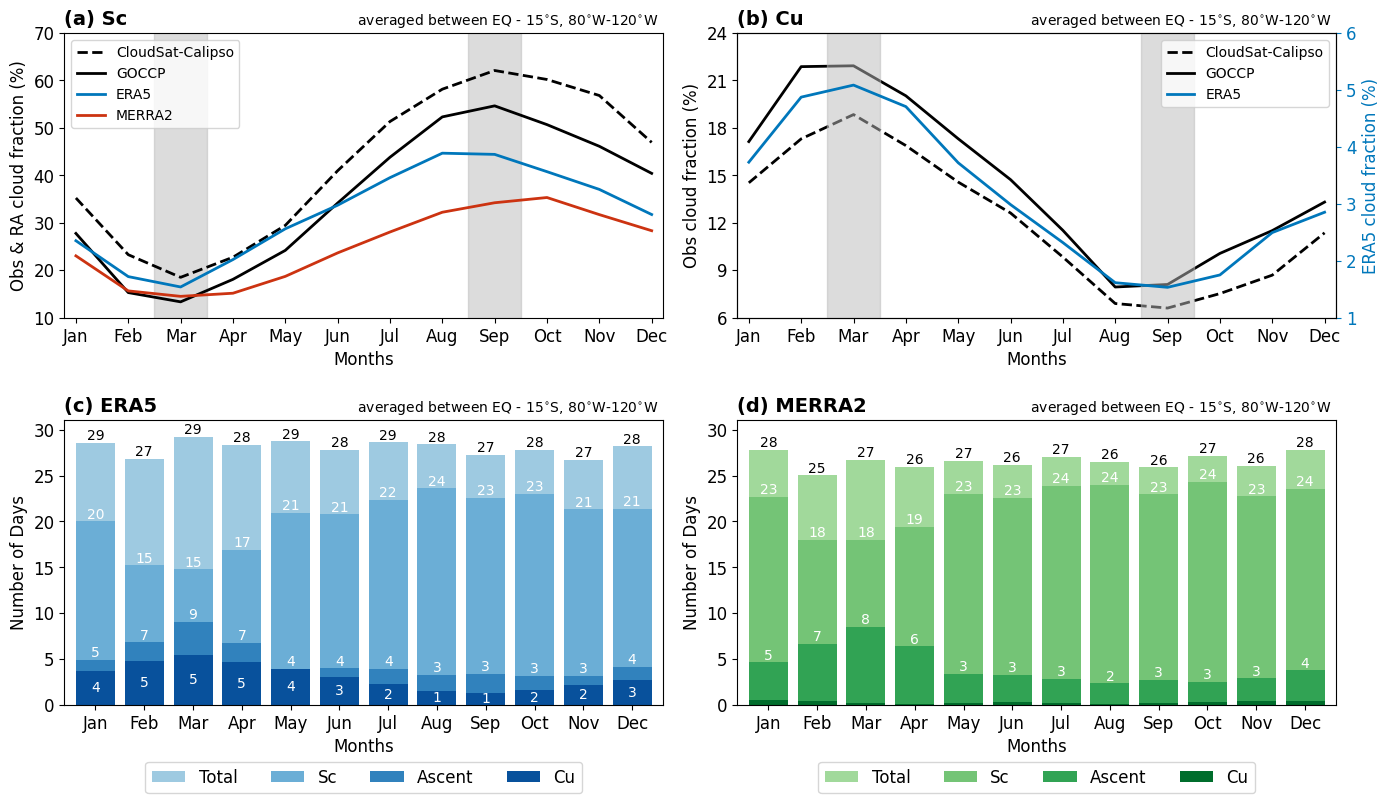

In [38]:

npan = 4

# all of the sizes are double the size they'll be in the paper 
fig = plt.figure(figsize=(14,15), tight_layout=True)
for j in range(0,4,1):
    ax1 = fig.add_subplot(npan,2,j+1)

    if j == 0:
        plt.plot(months, cc_sc_yz*100,color="#000000",label="CloudSat-Calipso", linestyle='--', linewidth = 2)
        ax1.plot(months, gc_sc_yz*100,color="#000000",label="GOCCP", linewidth = 2)
        #plt.plot(months, corr_gc_np,color="#2166AC",label="GOCCP vs. CC")
        ax1.plot(months, era_sc_yz*100,color="#0077BB",label="ERA5", linewidth = 2)
        ax1.plot(months, merra_sc_yz*100,color="#CC3311",label="MERRA2", linewidth = 2)
        #plt.annotate('corr = {:.2f}'.format(corr_era), xy=(0.79, 0.94), xycoords='axes fraction',bbox=props)
        plt.xlabel('Months',fontsize=fs)
        plt.title('(a) '+cl_sc+'', loc='left',fontsize=14,fontweight = 'bold')
        plt.title(' averaged between EQ - 15$^{\circ}$S, 80$^{\circ}$W-120$^{\circ}$W  ', loc='right',fontsize=10)
        plt.ylabel('Obs & RA cloud fraction (%)',fontsize=fs)
        plt.margins(x=0.02)
        #plt.legend(loc="upper left")
        plt.axvspan(1.5, 2.5,color='#BBBBBB', alpha=0.5)
        plt.axvspan(7.5, 8.5,color='#BBBBBB', alpha=0.5)
        #plt.grid()
        #plt.xlim(0,11)
        plt.ylim(10,70)
        plt.xticks(fontsize =fs)
        plt.yticks(fontsize =fs)
        plt.legend(handles=[p1, p2, p3,p4],loc='upper left')
    

        
    elif j == 1:
        cl_cu = 'Cu'
        twin1 = ax1.twinx()
        p1, = ax1.plot(months, cc_cu_yz*100,color="#000000",label="CloudSat-Calipso", linestyle='--', linewidth = 2)
        p2, = ax1.plot(months, gc_cu_yz*100,color="#000000",label="GOCCP", linewidth = 2)
        plt.ylabel('ERA5 cloud fraction (%)',fontsize=fs, color ="#0077BB" )
        p3, = twin1.plot(months, era_cu_yz*100,color="#0077BB",label="ERA5", linewidth = 2)
        plt.tick_params(color ="#0077BB")

        p4, = twin1.plot(months, merra_cu_yz*100,color="#CC3311",label="MERRA2", linewidth = 2)
        ax1.set(ylim=(6,24))#,ylabel="cf (%)")
        #twin1.set(ylim=(0, 1),ylabel="cf (%)")
        #plt.ylim(3,7)
        plt.margins(x=0.02)

        #ax1.legend(handles=[p1, p2, p3,p4])
        plt.title('(b) '+cl_cu+'', loc='left',fontsize=14,fontweight = 'bold')
        plt.title(' averaged between EQ - 15$^{\circ}$S, 80$^{\circ}$W-120$^{\circ}$W  ', loc='right',fontsize=10)
        ax1.set_xlabel('Months',fontsize=fs)
        ax1.set_ylabel('Obs cloud fraction (%)',fontsize=fs)
        plt.yticks(fontsize =fs)
        plt.xticks(fontsize =fs)
        plt.ylim(1,6)
        ax1.set_yticks(np.arange(6, 27, 3))
        ax1.tick_params(axis='y', labelsize=fs)
        #plt.ylim(1,5)
        ax1.tick_params(axis='x', labelsize=fs)
        plt.axvspan(1.5, 2.5,color='#BBBBBB', alpha=0.5)
        plt.axvspan(7.5, 8.5,color='#BBBBBB', alpha=0.5)

        #plt.xticks(fontsize =fs)
        plt.yticks(fontsize =fs, color="#0077BB")
        plt.legend(handles=[p1, p2, p3],loc='upper right')#, ncol =4,fontsize=12,bbox_to_anchor=(0.,-.32, -.2, 4.5))


    elif j == 2:
        b1 = plt.bar(months, (era_sc_days_yz+era_ta_days_yz+era_cu_days_yz),color="#9ecae1",label="Total",  bottom=base_value)
        b2 = plt.bar(months, era_sc_days_yz,color="#6baed6",label="Sc",  bottom=base_value)
        b3 = plt.bar(months, era_ta_days_yz,color="#3182bd",label="Ascent",  bottom=base_value)
        b4 = plt.bar(months, era_cu_days_yz,color="#08519c",label="Cu",  bottom=base_value)
        #plt.xlabel(months)
        plt.ylim(0,31)
        plt.title('(c) ERA5', loc='left',fontsize=14,fontweight = 'bold')
        plt.title(' averaged between EQ - 15$^{\circ}$S, 80$^{\circ}$W-120$^{\circ}$W  ', loc='right',fontsize=10)
        plt.xlabel('Months',fontsize=fs)
        plt.ylabel('Number of Days',fontsize=fs)
        plt.yticks(fontsize =fs)
        plt.xticks(fontsize =fs)
        plt.legend(loc='upper center',ncol =4,fontsize=12,bbox_to_anchor=(0.,-.32, 1, .15))
        plt.margins(x=0.02)
        ax1.bar_label(b1, fmt='%.0f',label_type='edge')
        ax1.bar_label(b2, fmt='%.0f',label_type='edge', color = 'white')
        ax1.bar_label(b3, fmt='%.0f',label_type='edge', color = 'white')
        ax1.bar_label(b4, fmt='%.0f',label_type='center', color = 'white')

    
    elif j == 3:
        b11 = plt.bar(months, (merra_sc_days_yz+merra_ta_days_yz+merra_cu_days_yz),color="#a1d99b",label="Total",  bottom=base_value)
        b22 = plt.bar(months, merra_sc_days_yz,color="#74c476",label="Sc",  bottom=base_value)
        b33 = plt.bar(months, merra_ta_days_yz,color="#31a354",label="Ascent",  bottom=base_value)
        plt.bar(months, merra_cu_days_yz,color="#006d2c",label="Cu",  bottom=base_value)
        #plt.xlabel(months)
        plt.ylim(0,31)
        plt.title('(d) MERRA2', loc='left',fontsize=14,fontweight = 'bold')
        plt.title(' averaged between EQ - 15$^{\circ}$S, 80$^{\circ}$W-120$^{\circ}$W  ', loc='right',fontsize=10)
        plt.yticks(fontsize =fs)
        plt.xticks(fontsize =fs)
        plt.margins(x=0.02)
        plt.xlabel('Months',fontsize=fs)
        plt.ylabel('Number of Days',fontsize=fs)
        ax1.bar_label(b11, fmt='%.0f',label_type='edge')
        ax1.bar_label(b22, fmt='%.0f',label_type='edge', color = 'white')
        ax1.bar_label(b33, fmt='%.0f',label_type='edge', color = 'white')
        plt.legend(loc='upper center',ncol =4,fontsize=12,bbox_to_anchor=(0.,-.32, 1, .15))

plt.savefig(figfolder+'SH_normalized_ctp_lcc_freq_monevo'+str(yr0)+'-'+str(yrf)+'.pdf' ,bbox_inches="tight",transparent=False)       